# Binary Classification with L1 Regularization on Moons Dataset

1. **Data Preparation**  
   - `make_moons(100, noise=0.25)` creates a 2D dataset with a moon-like shape and some noise.  
   - `plt.scatter()` visualizes the points colored by class labels (`y`).

2. **Model 1: Standard Dense Neural Network**  
   - Sequential model with two hidden layers (128 neurons each, ReLU activation).  
   - Output layer: 1 neuron with sigmoid activation for binary classification.  
   - Optimizer: Adam (learning rate 0.01), loss: binary crossentropy.  
   - Trained for 2000 epochs with 20% validation split.  
   - `plot_decision_regions()` visualizes the learned decision boundary.  
   - Loss and validation loss are plotted to track training progress.  

3. **Model 2: Dense NN with L1 Regularization**  
   - Same architecture as Model 1, but each hidden layer has `kernel_regularizer=l1(0.001)`.  
   - L1 regularization encourages **sparser weights** → reduces overfitting.  
   - Trained and visualized the same way as Model 1.

4. **Weight Analysis**  
   - Extracts weights of the first hidden layer from both models.  
   - `sns.boxplot()` and `sns.distplot()` compare the weight distributions.  
   - Observes that L1-regularized model tends to have **smaller and sparser weights**.  

**Purpose:** Compare standard NN vs. L1-regularized NN on a noisy dataset to see how regularization affects weights, decision boundaries, and overfitting.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
X, y = make_moons(100, noise=0.25,random_state=2)

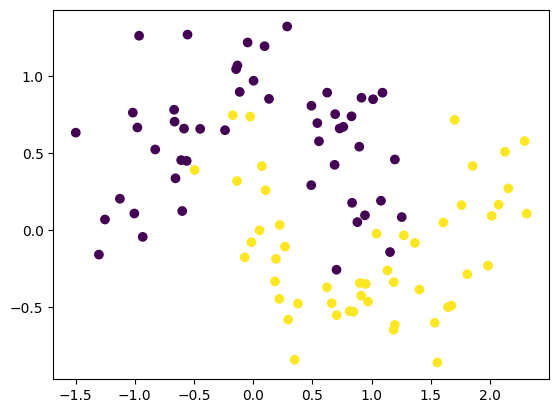

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [6]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


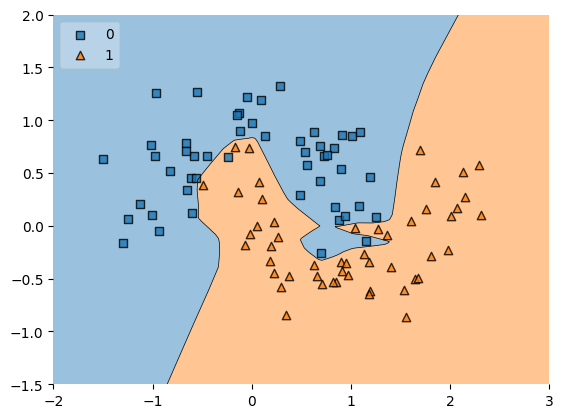

In [8]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

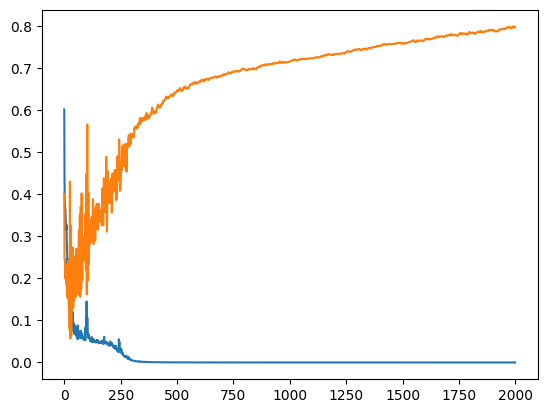

In [9]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [10]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


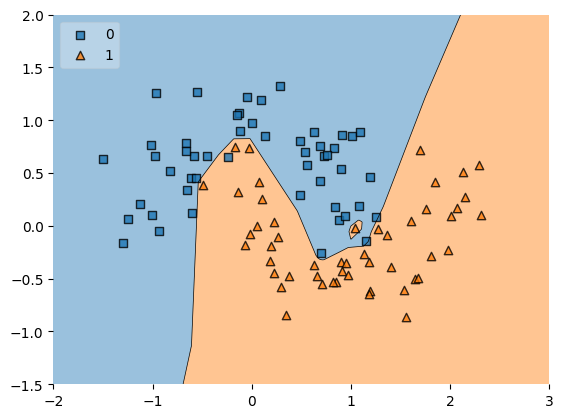

In [12]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

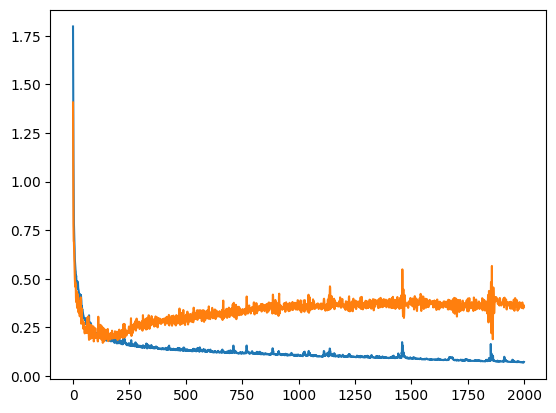

In [13]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [14]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

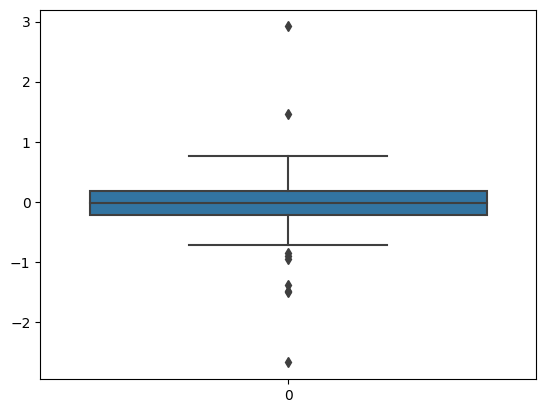

In [15]:
sns.boxplot(model1_weight_layer1)

<Axes: >

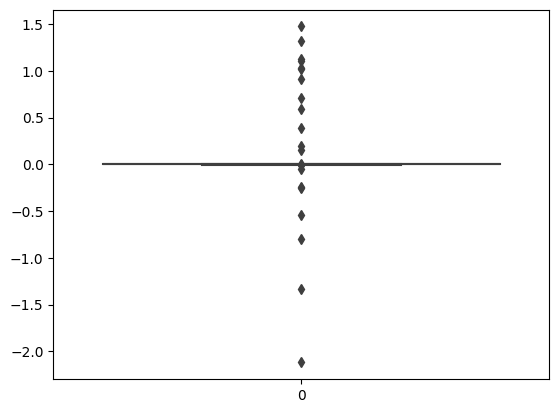

In [16]:
sns.boxplot(model2_weight_layer1)

In [17]:
model1_weight_layer1.min()

-2.6746492

In [18]:
model2_weight_layer1.min()

-2.118593

/tmp/ipykernel_48/2224180084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_48/2224180084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

F

<Axes: ylabel='Density'>

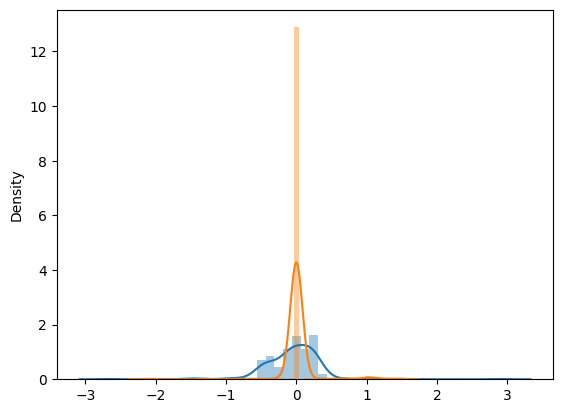

In [19]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [20]:
model1.get_weights()[0].reshape(256)

array([ 3.60925049e-02, -3.44999135e-01, -5.21587074e-01,  2.74615139e-01,
       -6.27245530e-02, -1.26344800e-01, -8.44616145e-02, -4.67793405e-01,
        9.77738649e-02,  2.94615980e-02,  2.88890690e-01,  1.40019625e-01,
       -2.21123323e-01, -4.36250091e-01,  2.39221081e-01, -3.67836863e-01,
        9.03163105e-02, -4.57162768e-01, -4.70703036e-01,  1.61501959e-01,
       -5.21094441e-01, -3.95990342e-01,  8.29211995e-02,  1.90824643e-01,
       -5.09565532e-01, -2.36485794e-01,  2.12540627e-01,  1.77954793e-01,
       -4.17653173e-01, -3.92405719e-01,  1.93173453e-01,  1.95443660e-01,
        2.77917832e-01, -5.66718996e-01,  1.82156429e-01, -3.36743057e-01,
       -2.07208648e-01, -3.95955592e-01,  2.00344011e-01,  4.66150753e-02,
        1.51512831e-01,  1.15203045e-01, -2.09443092e-01,  2.70701526e-03,
       -4.58794206e-01,  1.37992308e-01, -4.34002429e-01, -1.06365487e-01,
        2.77635813e-01,  2.73550838e-01, -3.19946945e-01, -2.13314295e-01,
        2.82040417e-01,  